In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
#loading the data set into data frame
df = pd.read_csv('/content/bank-full_edited.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
#The top 5 records of the data set
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
#The data set's data types, null values count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
#Replacing the target variable 'yes' with 1
df['y'] = df['y'].replace('yes', 1)

In [8]:
#Replacing the target variable 'no' with 0
df['y'] = df['y'].replace('no', 0)

In [9]:
#The values & counts of the feature 'AGE'
age_counts = df['age'].value_counts()

age_counts,df.age.mean()

(32    2085
 31    1996
 33    1972
 34    1930
 35    1894
       ... 
 93       2
 90       2
 95       2
 88       2
 94       1
 Name: age, Length: 77, dtype: int64,
 40.93621021432837)

In [10]:
#The values & counts of the feature 'job'
job_counts = df['job'].value_counts()
job_counts

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [11]:
#The values & counts of the feature 'marital'
marital_counts = df["marital"].value_counts()
marital_counts

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [12]:
#The values & counts of the feature 'education'
education_counts = df['education'].value_counts()
education_counts

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [13]:
#The values & counts of the feature 'housing'
housingloan_counts = df['housing'].value_counts()
housingloan_counts

yes    25130
no     20081
Name: housing, dtype: int64

In [14]:
#The values & counts of the feature 'contact'
contact_counts = df['contact'].value_counts()
contact_counts

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [15]:
#The values & counts of the feature 'month'
contact_month_counts = df['month'].value_counts()
contact_month_counts

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [16]:
#The values & counts of the feature 'poutcome'
prev_outcome_counts = df['poutcome'].value_counts()
prev_outcome_counts

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [17]:
#Now, we look at the counts of the target variable; if they subscribed to the term deposit
outcome_counts = df['y'].value_counts()
outcome_counts

0    39922
1     5289
Name: y, dtype: int64

In [18]:
#dummying all categorical values
job = pd.get_dummies(df['job'],drop_first=True)
marital =pd.get_dummies(df['marital'],drop_first=True)
education=pd.get_dummies(df['education'],drop_first=True)
housing=pd.get_dummies(df['housing'],drop_first=True)
loan =pd.get_dummies(df['loan'],drop_first=True)
contact=pd.get_dummies(df['contact'],drop_first=True)
month=pd.get_dummies(df['month'],drop_first=True)
poutcome=pd.get_dummies(df['poutcome'],drop_first=True)


In [19]:
#dropping the columns which aren't needed
df.drop(['default','job','marital','education','housing','loan','contact','month','poutcome'],axis=1,inplace=True)

In [20]:
#concatenate new columns
df=pd.concat([df,job,marital,education,housing,loan,contact,month,poutcome],axis=1)

df

,age,balance,day,duration,campaign,pdays,previous,y,blue-collar,entrepreneur,...,jul,jun,mar,may,nov,oct,sep,other,success,unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,1,0,0,...,0,0,0,0,1,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [21]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y,blue-collar,entrepreneur,...,jul,jun,mar,may,nov,oct,sep,other,success,unknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985,0.215257,0.032890,...,0.152507,0.118135,0.010551,0.304483,0.087810,0.016323,0.012807,0.040698,0.033421,0.817478
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406,0.411005,0.178351,...,0.359516,0.322771,0.102174,0.460193,0.283022,0.126718,0.112441,0.197592,0.179735,0.386278
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
#The columns/features of data set
df.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown', 'married', 'single', 'secondary', 'tertiary',
       'unknown', 'yes', 'yes', 'telephone', 'unknown', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'other',
       'success', 'unknown'],
      dtype='object')

In [24]:
#Making sure all the features are in numerical values
df.dtypes

age              int64
balance          int64
day              int64
duration         int64
campaign         int64
pdays            int64
previous         int64
y                int64
blue-collar      uint8
entrepreneur     uint8
housemaid        uint8
management       uint8
retired          uint8
self-employed    uint8
services         uint8
student          uint8
technician       uint8
unemployed       uint8
unknown          uint8
married          uint8
single           uint8
secondary        uint8
tertiary         uint8
unknown          uint8
yes              uint8
yes              uint8
telephone        uint8
unknown          uint8
aug              uint8
dec              uint8
feb              uint8
jan              uint8
jul              uint8
jun              uint8
mar              uint8
may              uint8
nov              uint8
oct              uint8
sep              uint8
other            uint8
success          uint8
unknown          uint8
dtype: object

In [25]:
#Taking a look at the data set with relevant features
df.head()

,age,balance,day,duration,campaign,pdays,previous,y,blue-collar,entrepreneur,...,jul,jun,mar,may,nov,oct,sep,other,success,unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [49]:
#Checking for null values
df.isnull().sum()

age              0
balance          0
day              0
duration         0
campaign         0
pdays            0
previous         0
y                0
blue-collar      0
entrepreneur     0
housemaid        0
management       0
retired          0
self-employed    0
services         0
student          0
technician       0
unemployed       0
unknown          0
married          0
single           0
secondary        0
tertiary         0
unknown          0
yes              0
yes              0
telephone        0
unknown          0
aug              0
dec              0
feb              0
jan              0
jul              0
jun              0
mar              0
may              0
nov              0
oct              0
sep              0
other            0
success          0
unknown          0
dtype: int64

EDA


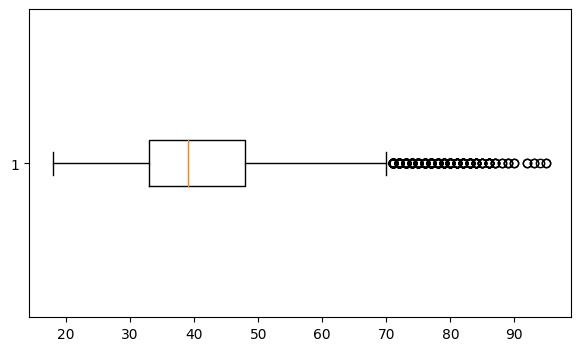

In [26]:
#DISTRIBUTION OF AGES
plt.figure(figsize=(7,4))
plt.boxplot(df['age'],vert=False)
plt.show()

In [27]:
#EDA :: Correlation matrix
correlation_matrix = df.corr()
correlation_matrix

,age,balance,day,duration,campaign,pdays,previous,y,blue-collar,entrepreneur,...,jul,jun,mar,may,nov,oct,sep,other,success,unknown
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155,-0.044002,0.021792,...,0.002902,0.051768,0.019499,-0.127431,0.032775,0.060116,0.032418,-0.022967,0.035526,-0.000816
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838,-0.048757,0.009642,...,-0.064402,0.029566,0.023196,-0.071121,0.117254,0.040198,0.021922,0.008466,0.035240,-0.030271
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348,-0.022898,-0.002312,...,0.147199,-0.193807,-0.020749,-0.025066,0.096080,0.030514,-0.053890,-0.032952,-0.030321,0.086256
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521,0.009637,-0.001327,...,0.016163,-0.021426,-0.005519,0.007089,-0.006041,0.015076,0.015077,-0.001958,0.042389,-0.003491
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172,0.008986,0.002128,...,0.104148,0.043893,-0.018612,-0.067551,-0.084697,-0.051031,-0.036718,-0.020107,-0.057486,0.107965
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621,0.020063,-0.014203,...,-0.136274,-0.113476,0.032002,0.079029,0.007892,0.056814,0.084427,0.389791,0.228539,-0.869962
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236,-0.017095,-0.008181,...,-0.082943,-0.060765,0.027273,0.001341,0.037868,0.053934,0.064990,0.306615,0.201424,-0.532763
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000,-0.072083,-0.019662,...,-0.034382,-0.016805,0.129456,-0.102500,-0.014937,0.128531,0.123185,0.031955,0.306788,-0.167051
blue-collar,-0.044002,-0.048757,-0.022898,0.009637,0.008986,0.020063,-0.017095,-0.072083,1.000000,-0.096585,...,-0.013203,0.021727,-0.041441,0.165448,-0.048027,-0.042410,-0.044816,0.001342,-0.053074,0.022194
entrepreneur,0.021792,0.009642,-0.002312,-0.001327,0.002128,-0.014203,-0.008181,-0.019662,-0.096585,1.000000,...,0.025949,0.015497,-0.016615,-0.009908,0.051017,-0.012012,-0.007769,-0.013506,-0.019111,0.014901


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [29]:
#Seperating the target variable from the data set
X = df.drop('y', axis=1)
y = df['y']

In [30]:
#Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((36168, 41), (9043, 41))

LOGISITIC REGRESSION MODEL

In [31]:
#Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy: {accuracy:.2f}')
#Accuracy: 88.80

Accuracy: 88.88


In [33]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)
#Confusion Matrix:
#[[7797  155]
# [ 851  240]]

Confusion Matrix:
[[7797  155]
 [ 851  240]]


In [34]:
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.61      0.22      0.32      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043



DECISION TREE MODEL

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [37]:
y_pred_gini=clf.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.2f}'. format(accuracy_score(y_test, y_pred_gini)*100))
#Model accuracy score with criterion gini index: 89.59

Model accuracy score with criterion gini index: 89.59


In [39]:
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.61      0.22      0.32      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043



In [40]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)
#Confusion Matrix:
#[[7716  236]
 #[ 639  452]]

Confusion Matrix:
[[7797  155]
 [ 851  240]]


RANDOM FOREST MODEL

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rfc= RandomForestClassifier(criterion='gini', random_state=0)

rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [43]:
y_pred = rfc.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score

print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))
#Model accuracy score : 90.3240

Model accuracy score : 90.3240


In [45]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)
#Confusion Matrix:
#[[7716  236]
# [ 639  452]]



Confusion Matrix:
[[7716  236]
 [ 639  452]]


In [46]:
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.66      0.41      0.51      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.69      0.73      9043
weighted avg       0.89      0.90      0.89      9043

